In [2]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina' # I use a HiDPI screen

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Main Results
The derivative does not converge for smaller powers (n = 0 and n =2), but it does seem to converge for n = 4. The code does not finish running for n = 6 and larger step sizes. 

In [3]:
from fishchips.experiments import CMB_Primary
from fishchips.cosmo import Observables
import fishchips.cmb_lensing
import fishchips.util

from classy import Class  # CLASS python wrapper
import numpy as np
import matplotlib.pyplot as plt
default_color_list = ['#1A1A1A', '#0072B2', '#009E73', '#D55E00', '#CC79A7', '#F0E442', '#56B4E9']

In [4]:
# create an Observables object to store information for derivatives
pars = np.array( ['omega_b', 'omega_dmeff', 'h',  'A_s', 'n_s', 'tau_reio', 'sigma_dmeff'])
centers = np.array([0.02222,  0.1197,  0.69,  2.1955e-9, 0.9655, 0.06, 0.0])
nparams = len(pars)

# generate a template CLASS python wrapper configuration
classy_template = {  'output': 'tCl,pCl,lCl,mPk',
                'l_max_scalars': 5000,
                'lensing': 'yes',
                'omega_cdm':1e-22,
                   
                'm_dmeff':1,
                'npow_dmeff' : 0,
                   
                'tight_coupling_trigger_tau_c_over_tau_k':0.,
                'tight_coupling_trigger_tau_c_over_tau_h':0.,
                'reionization_optical_depth_tol': 1e-07,
                'tol_background_integration': 1e-8,
                'tol_perturb_integration': 1e-8,
                'tol_thermo_integration': 1e-9,
                'perturb_sampling_stepsize':0.01,
                'k_max_tau0_over_l_max' : 6,
                'P_k_max_h/Mpc' : 5.,
                'gauge' : 'synchronous',
                'k_per_decade_for_pk' : 100 }

left_steps = np.array([0.0008, 0.003,   0.02,   0.1e-9, 0.01, 0.02, 0.0])
right_steps = np.array([0.0008, 0.003,   0.02,   0.1e-9, 0.01, 0.02, 1e-29])

obs = Observables(parameters=pars,
                  fiducial=centers,
                  left=centers-left_steps,
                  right=centers+right_steps)

# add in the fiducial values too
classy_template.update(dict(zip(obs.parameters, obs.fiducial)))

In [5]:
# generate the fiducial cosmology
obs.compute_cosmo(key='fiducial',
                  classy_dict=classy_template)

## 15 keV, n=0
The derivative does not seem to converge: I started with the interval close to the upper bound from the paper, and went both way (to larger and smaller $\sigma$s), but the derivative does not converge in both cases.

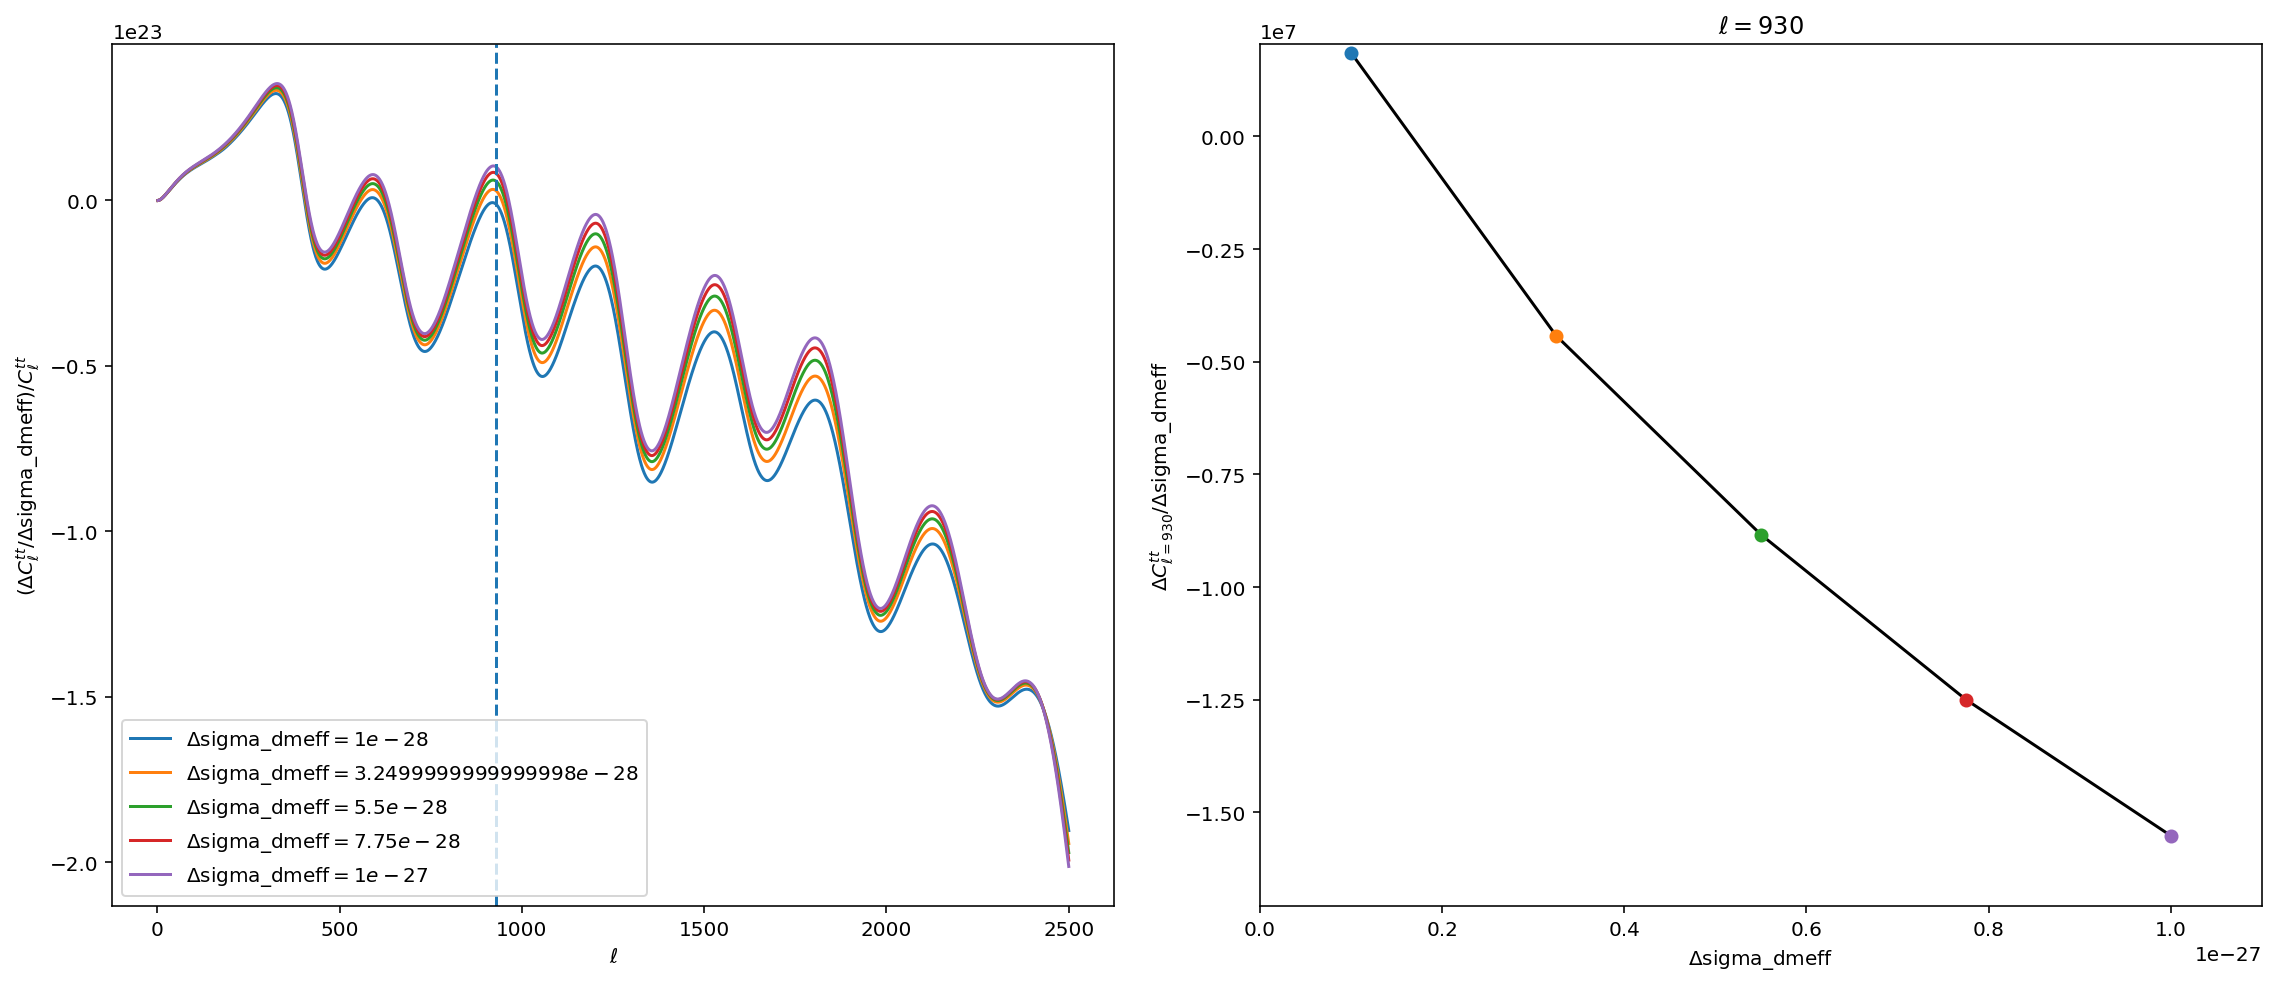

In [6]:
classy_template['m_dmeff'] = 15e-6
classy_template['npow_dmeff'] = 0
# change the size
# in paper 8.8e-27
obs.check_deriv_compute("sigma_dmeff", np.linspace(1e-28, 1e-27, 5), 
                        classy_template, verbose=False)
obs.check_deriv_plot('sigma_dmeff', ell=930, l_max=2500)

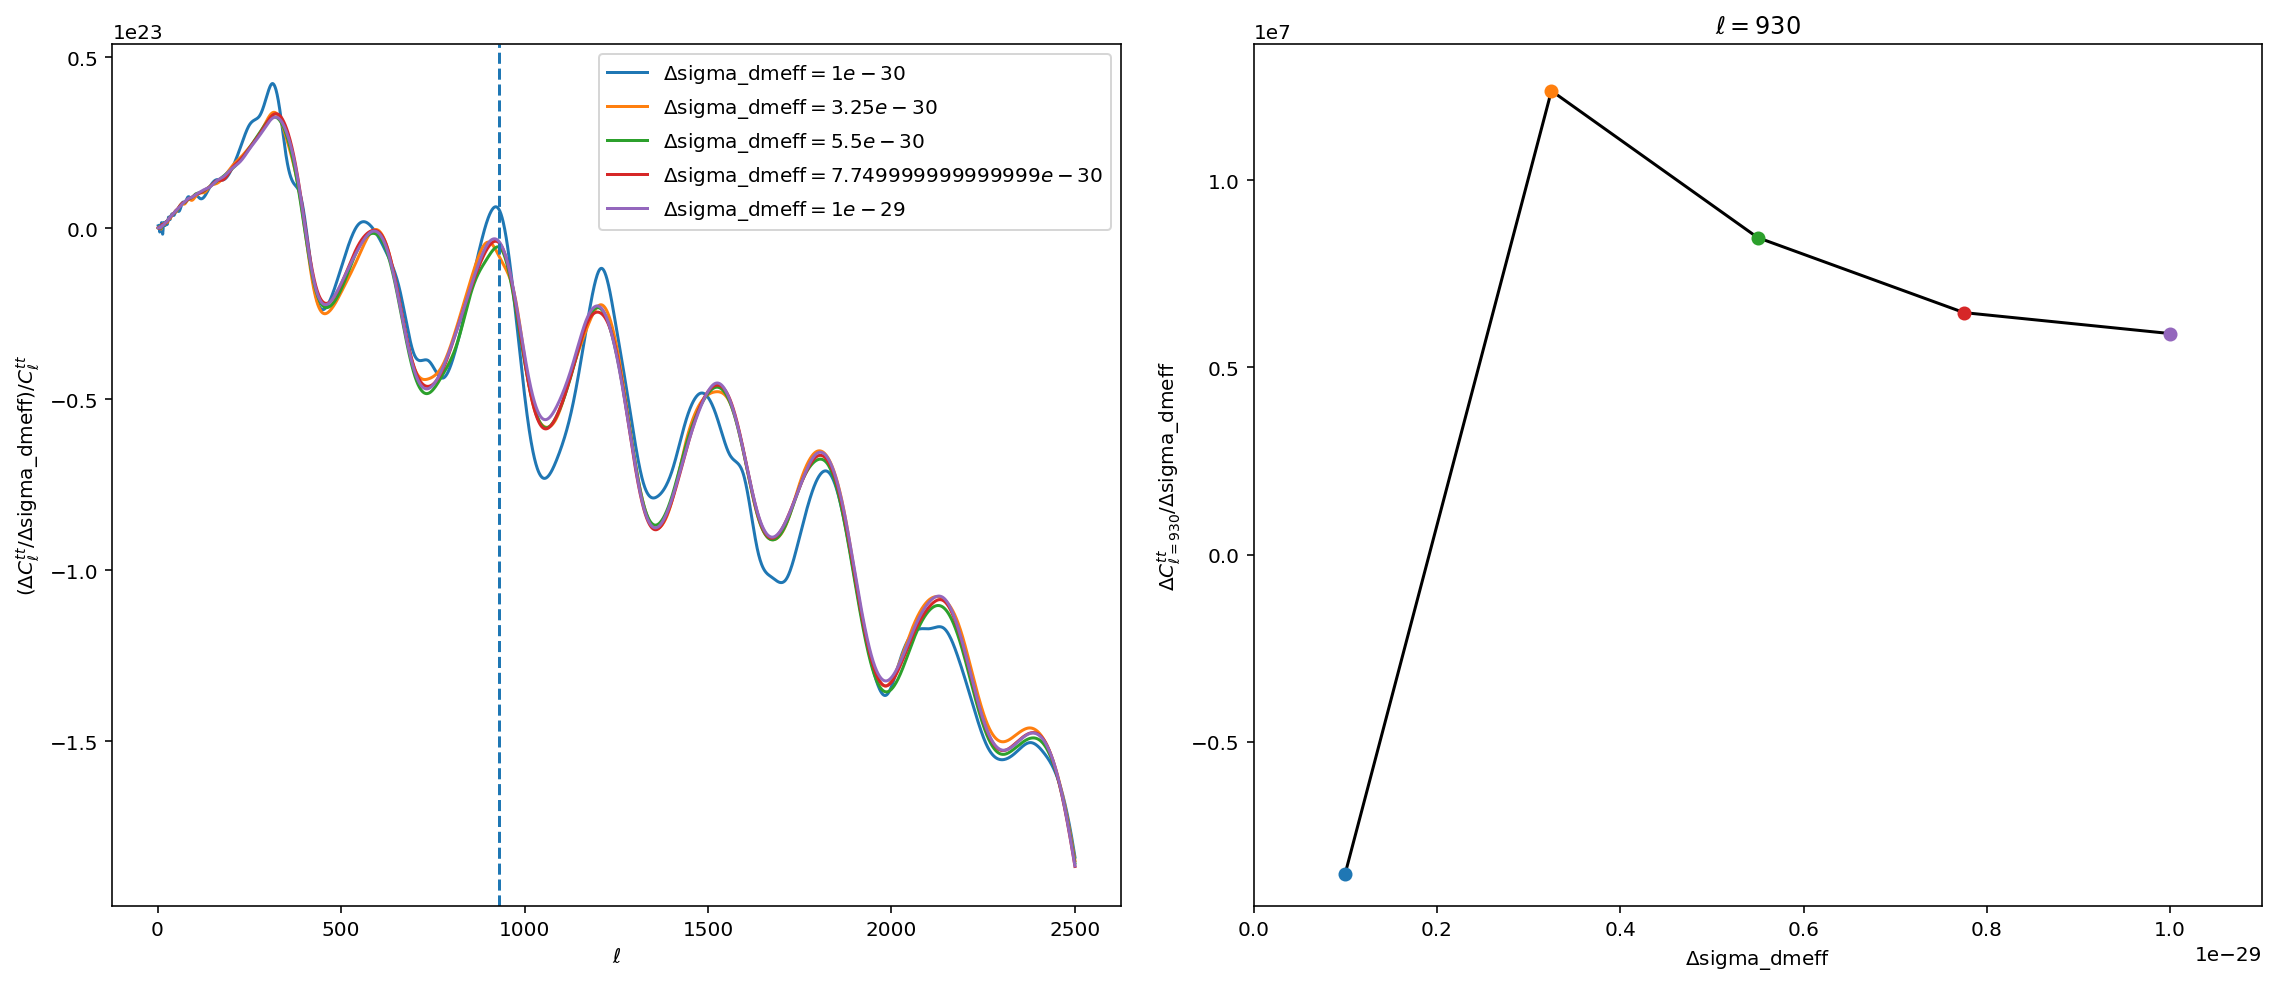

In [7]:
# smaller sigma, numerical noise
classy_template['m_dmeff'] = 15e-6
classy_template['npow_dmeff'] = 0
# change the size
# in paper 8.8e-27
# in my JP 
obs.check_deriv_compute("sigma_dmeff", np.linspace(1e-30, 1e-29, 5), 
                        classy_template, verbose=False)
obs.check_deriv_plot('sigma_dmeff', ell=930, l_max=2500)

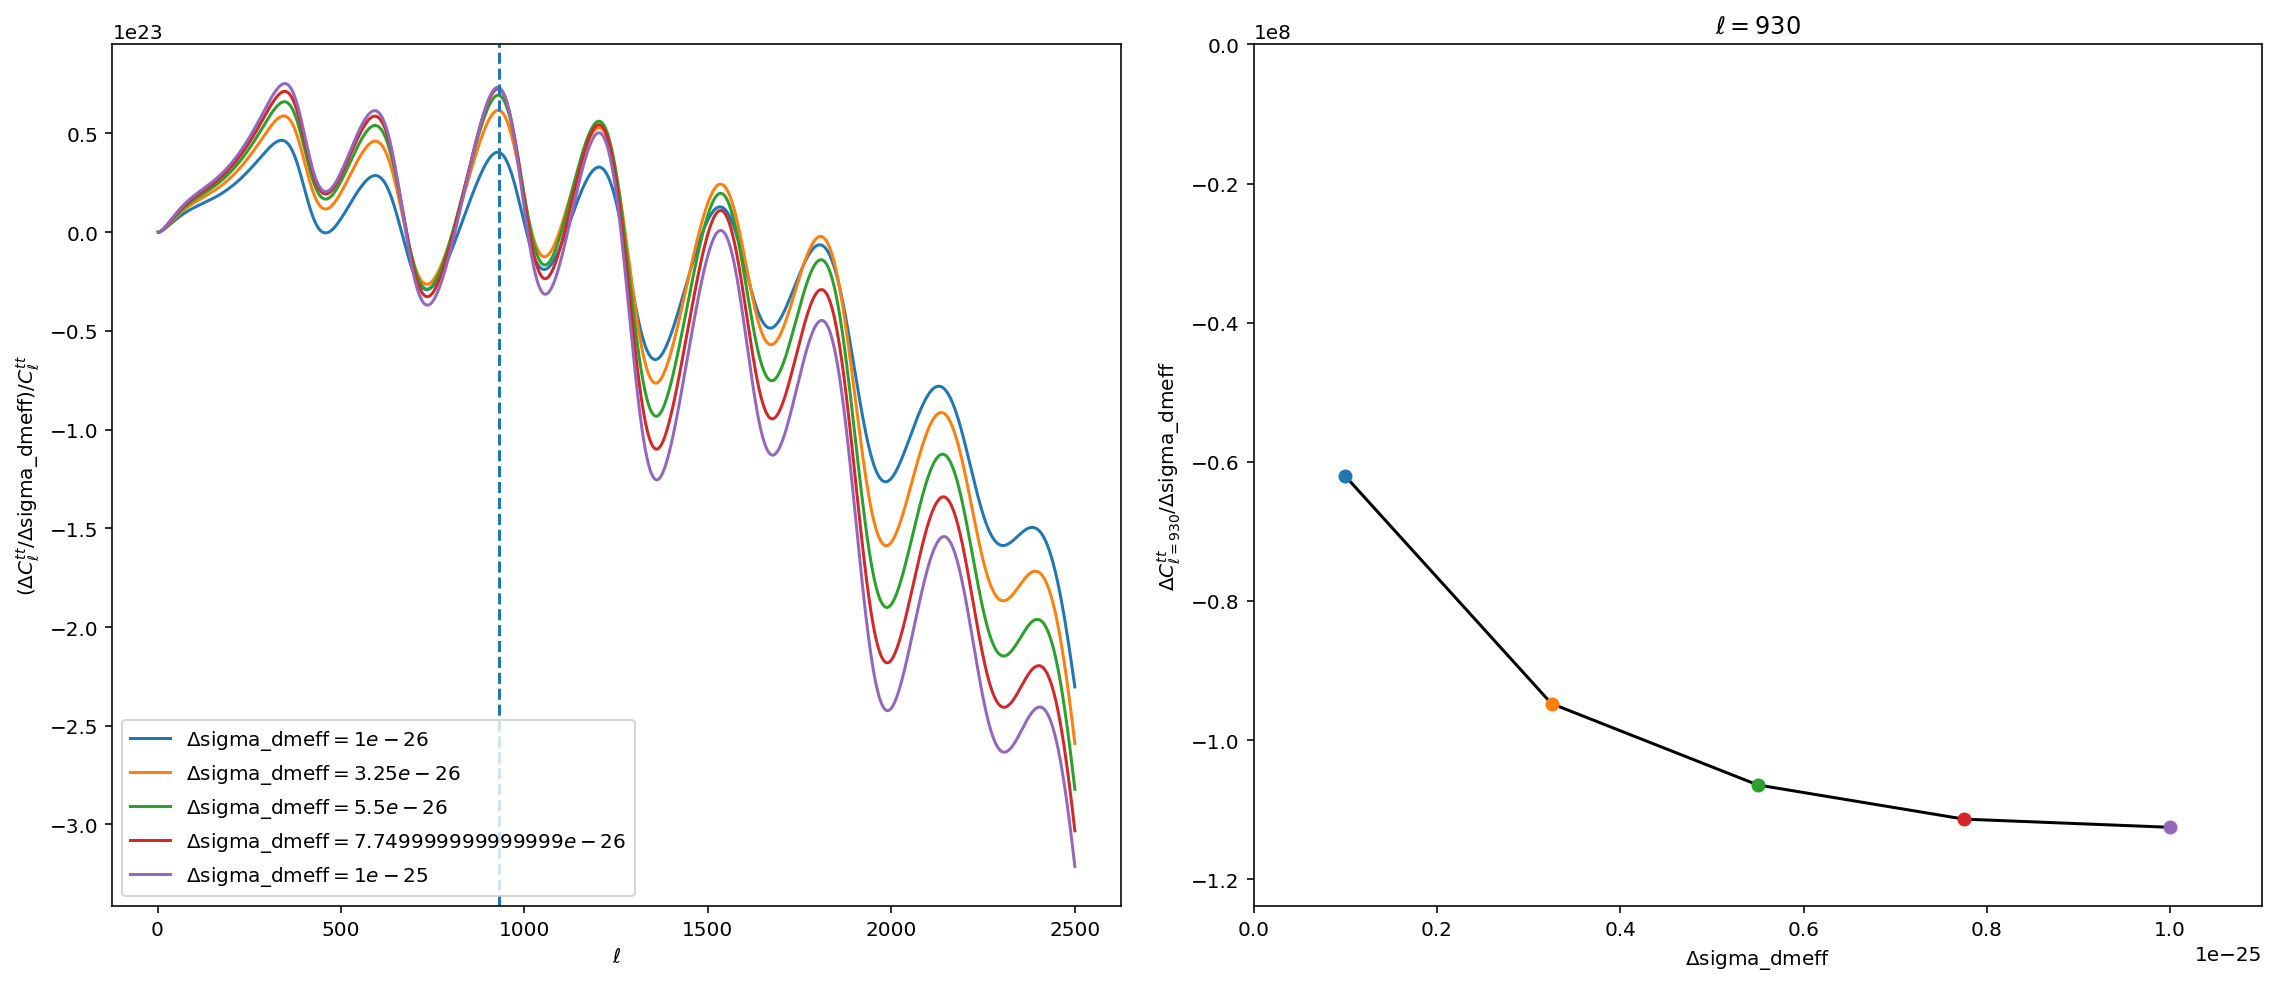

In [8]:
# larger sigma, derivative diverges
classy_template['m_dmeff'] = 15e-6
classy_template['npow_dmeff'] = 0
# change the size
# in paper 8.8e-27
# in my JP 
obs.check_deriv_compute("sigma_dmeff", np.linspace(1e-26, 1e-25, 5), 
                        classy_template, verbose=False)
obs.check_deriv_plot('sigma_dmeff', ell=930, l_max=2500)

## 15 keV, n=2
The derivative does not converge, the same situation as above.

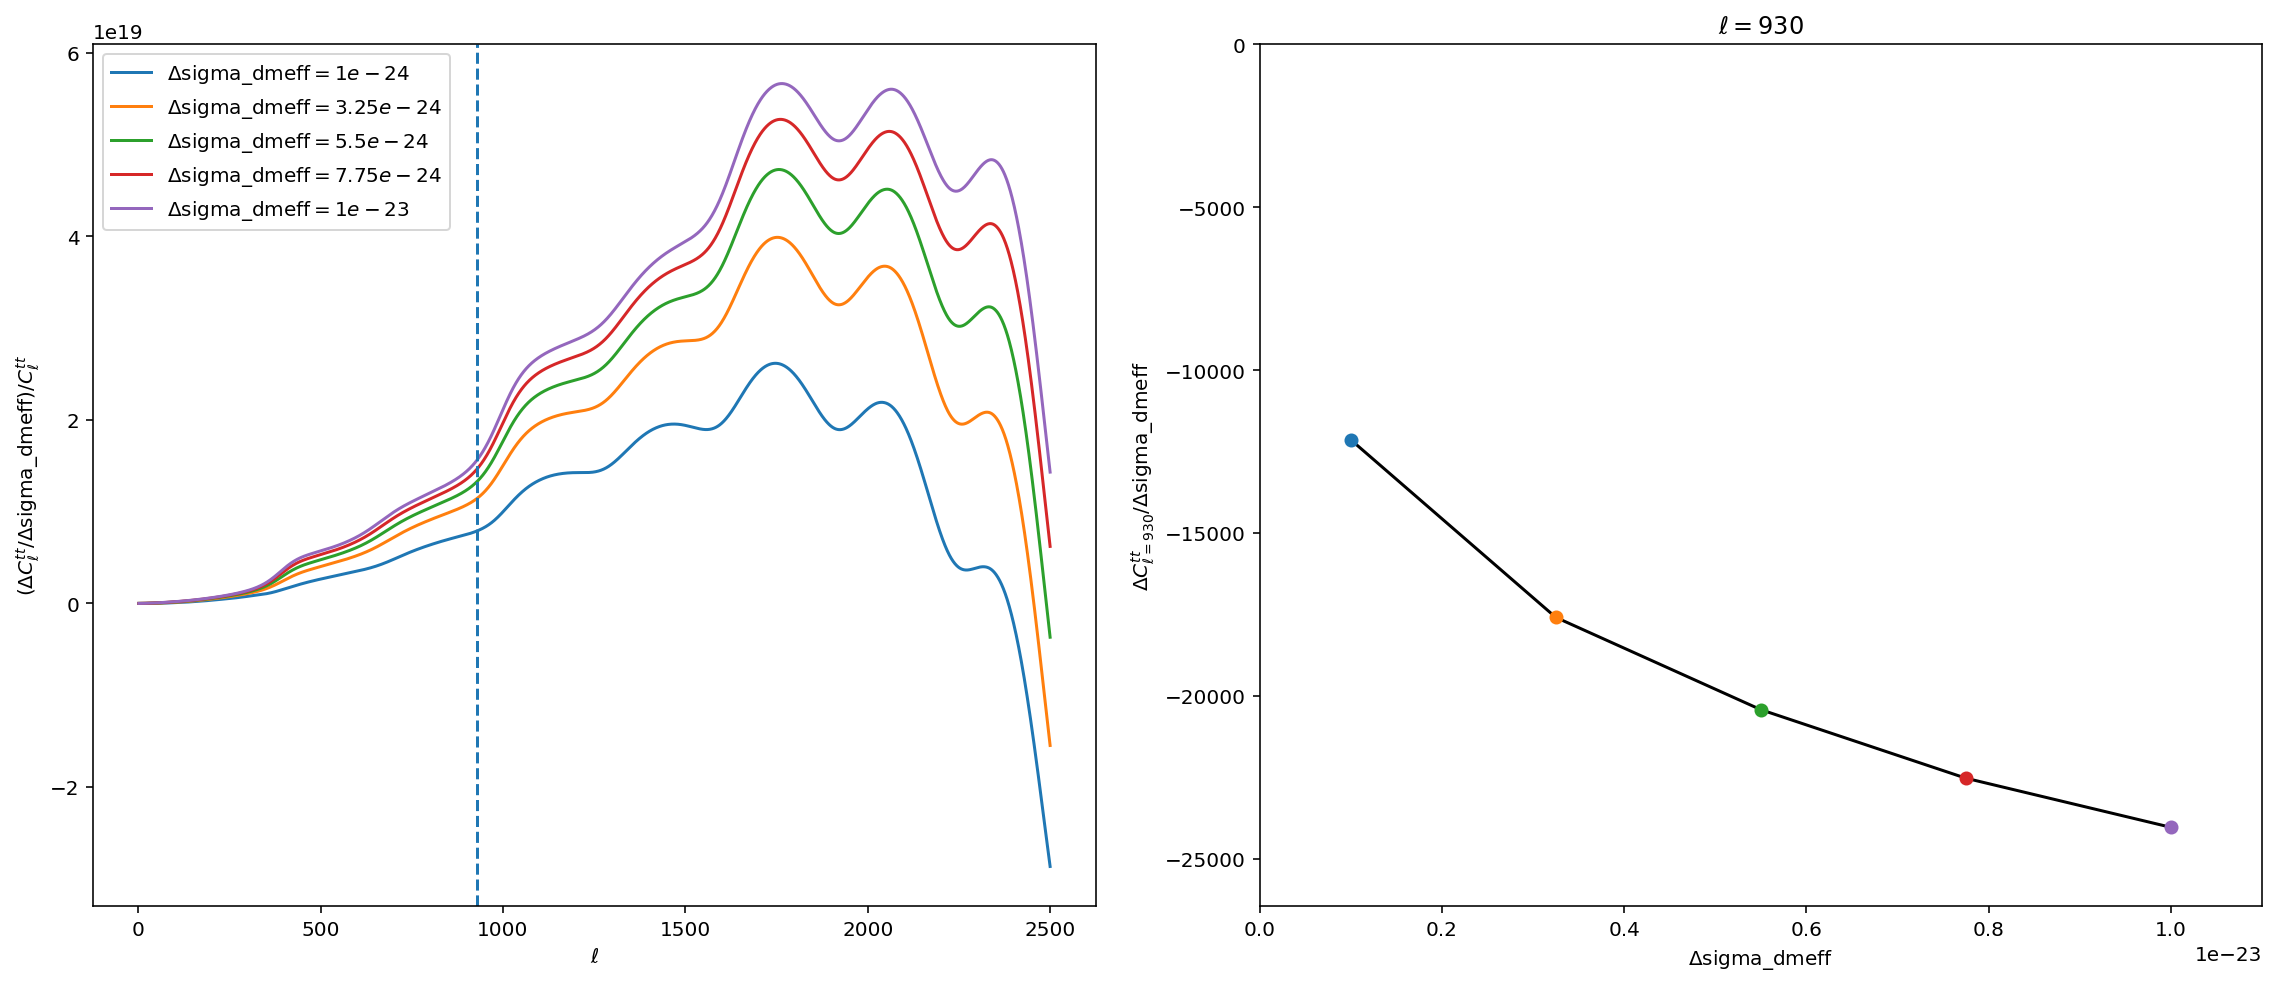

In [9]:
classy_template['m_dmeff'] = 15e-6
classy_template['npow_dmeff'] = 2
# change the size 
# in paper 4.2e-23
# in my JP 
obs.check_deriv_compute("sigma_dmeff", np.linspace(1e-24, 1e-23, 5), 
                        classy_template, verbose=False)
obs.check_deriv_plot('sigma_dmeff', ell=930, l_max=2500)

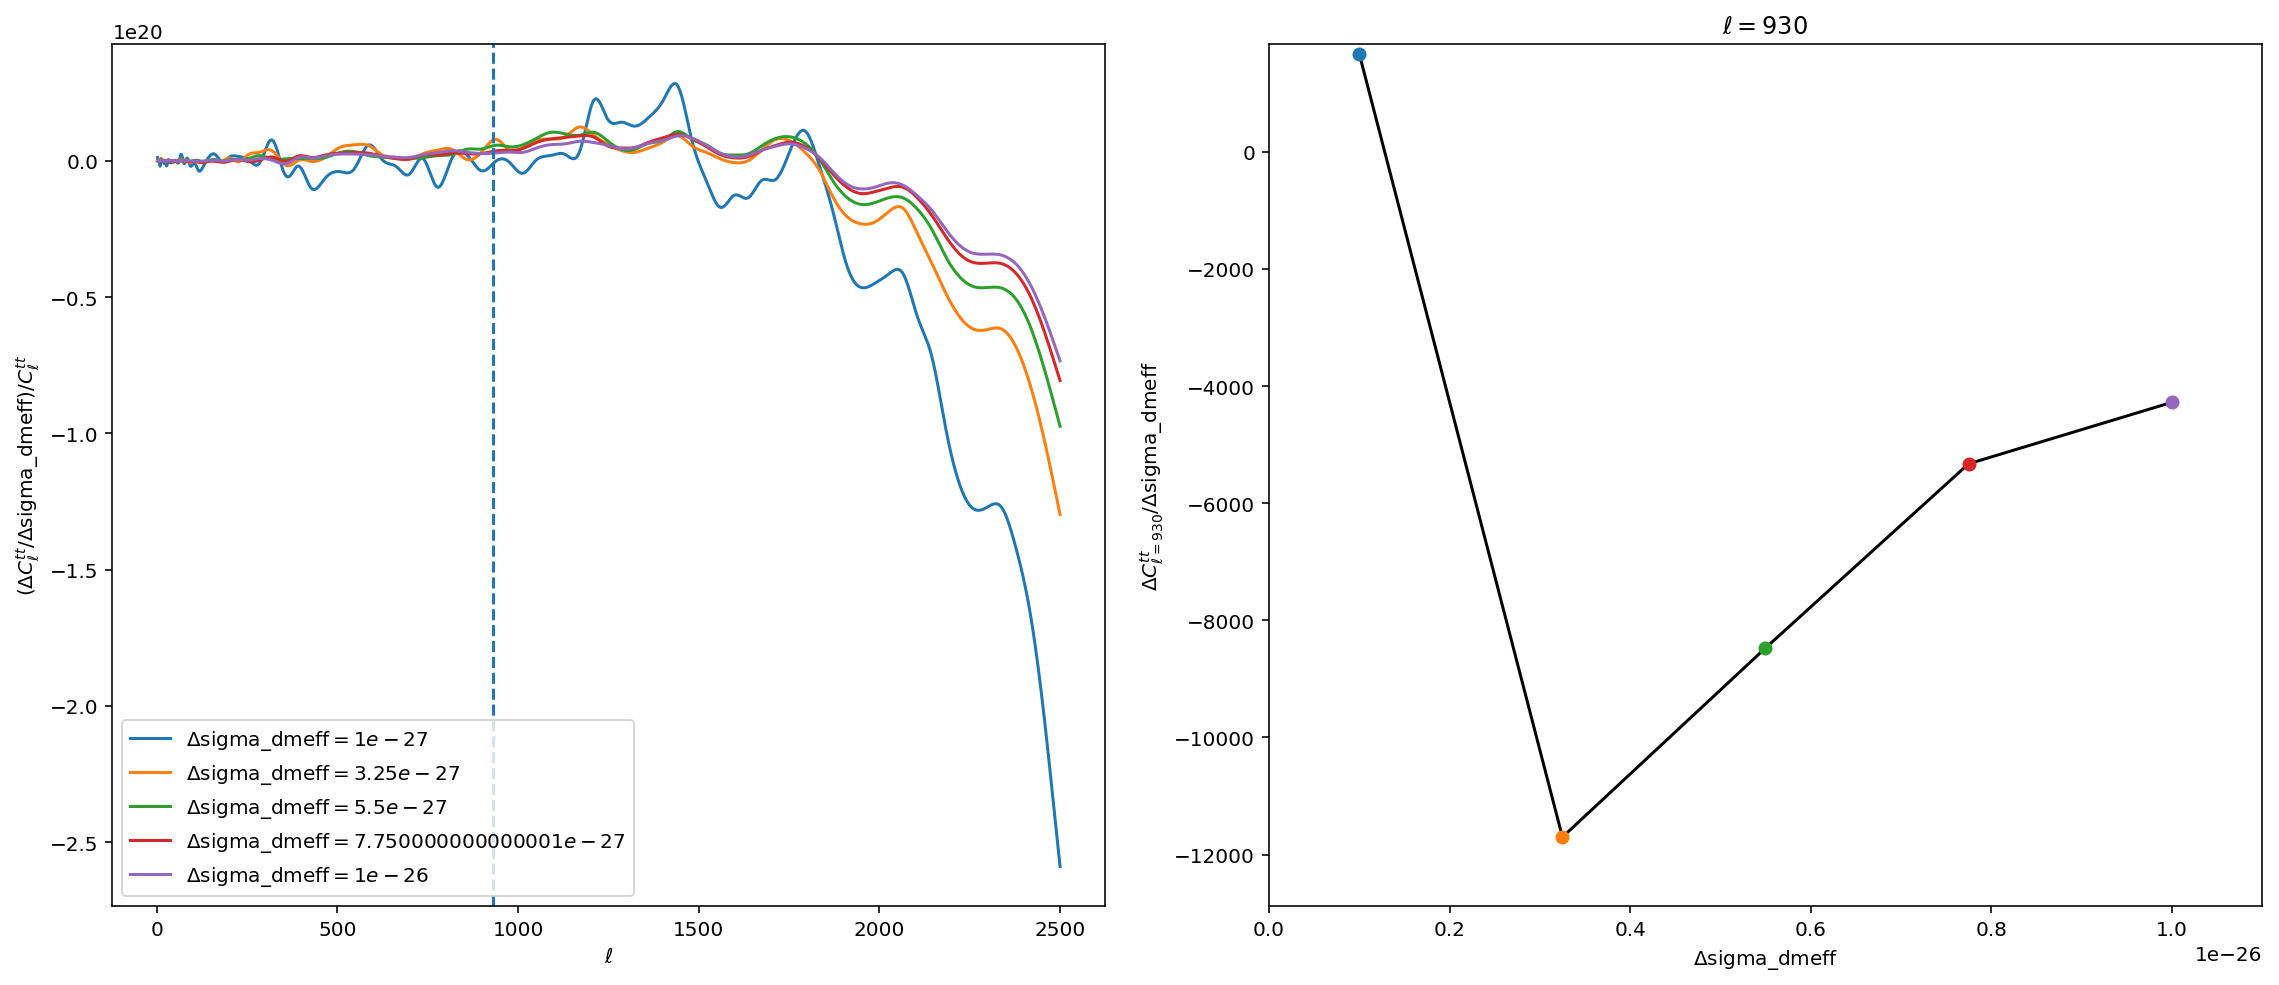

In [10]:
classy_template['m_dmeff'] = 15e-6
classy_template['npow_dmeff'] = 2
# change the size 
# in paper 4.2e-23
# in my JP 
obs.check_deriv_compute("sigma_dmeff", np.linspace(1e-27, 1e-26, 5), 
                        classy_template, verbose=False)
obs.check_deriv_plot('sigma_dmeff', ell=930, l_max=2500)

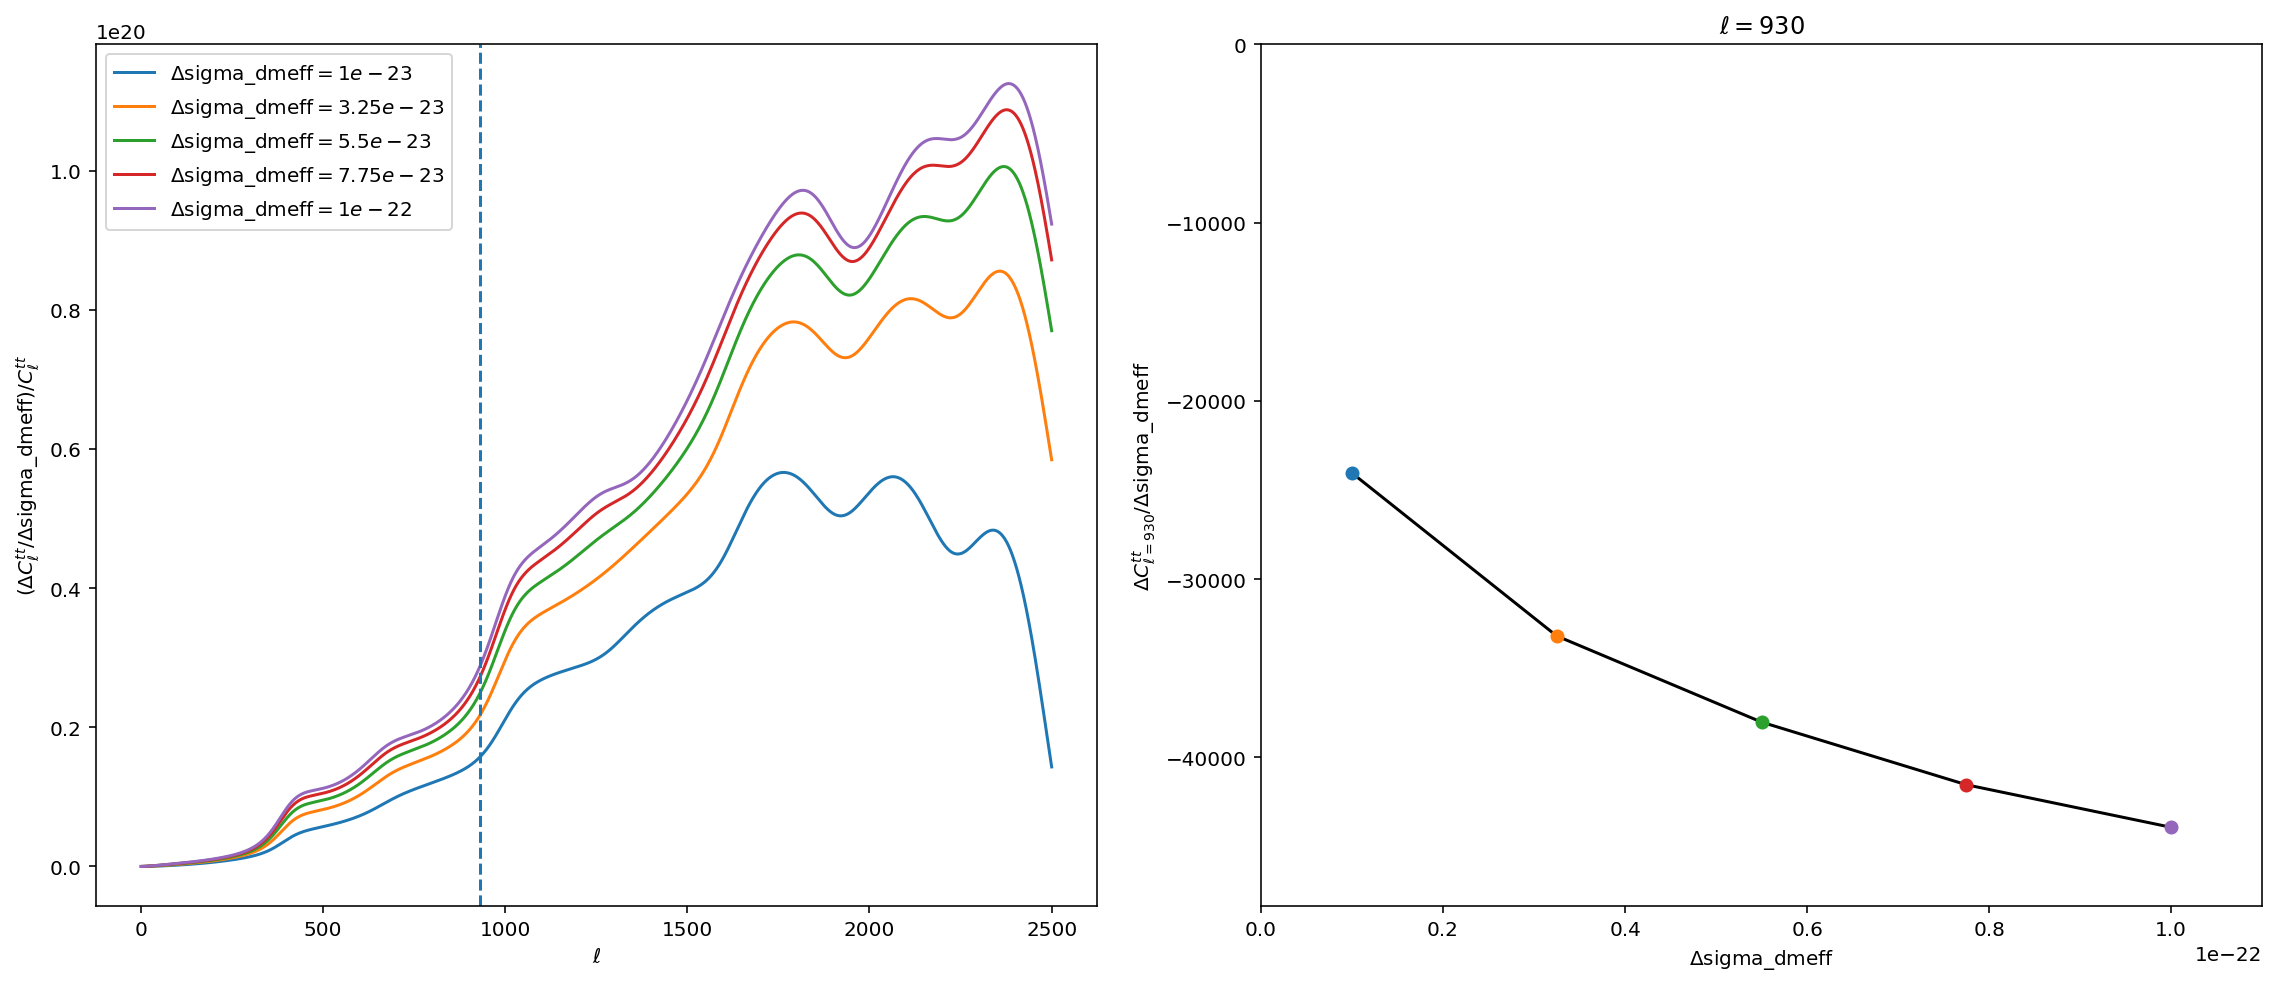

In [11]:
classy_template['m_dmeff'] = 15e-6
classy_template['npow_dmeff'] = 2
# change the size 
# in paper 4.2e-23
# in my JP 
obs.check_deriv_compute("sigma_dmeff", np.linspace(1e-23, 1e-22, 5), 
                        classy_template, verbose=False)
obs.check_deriv_plot('sigma_dmeff', ell=930, l_max=2500)

## 15 keV, n=4
The derivative seems to converge fairly well on the interval [1e-21, 1e-20]

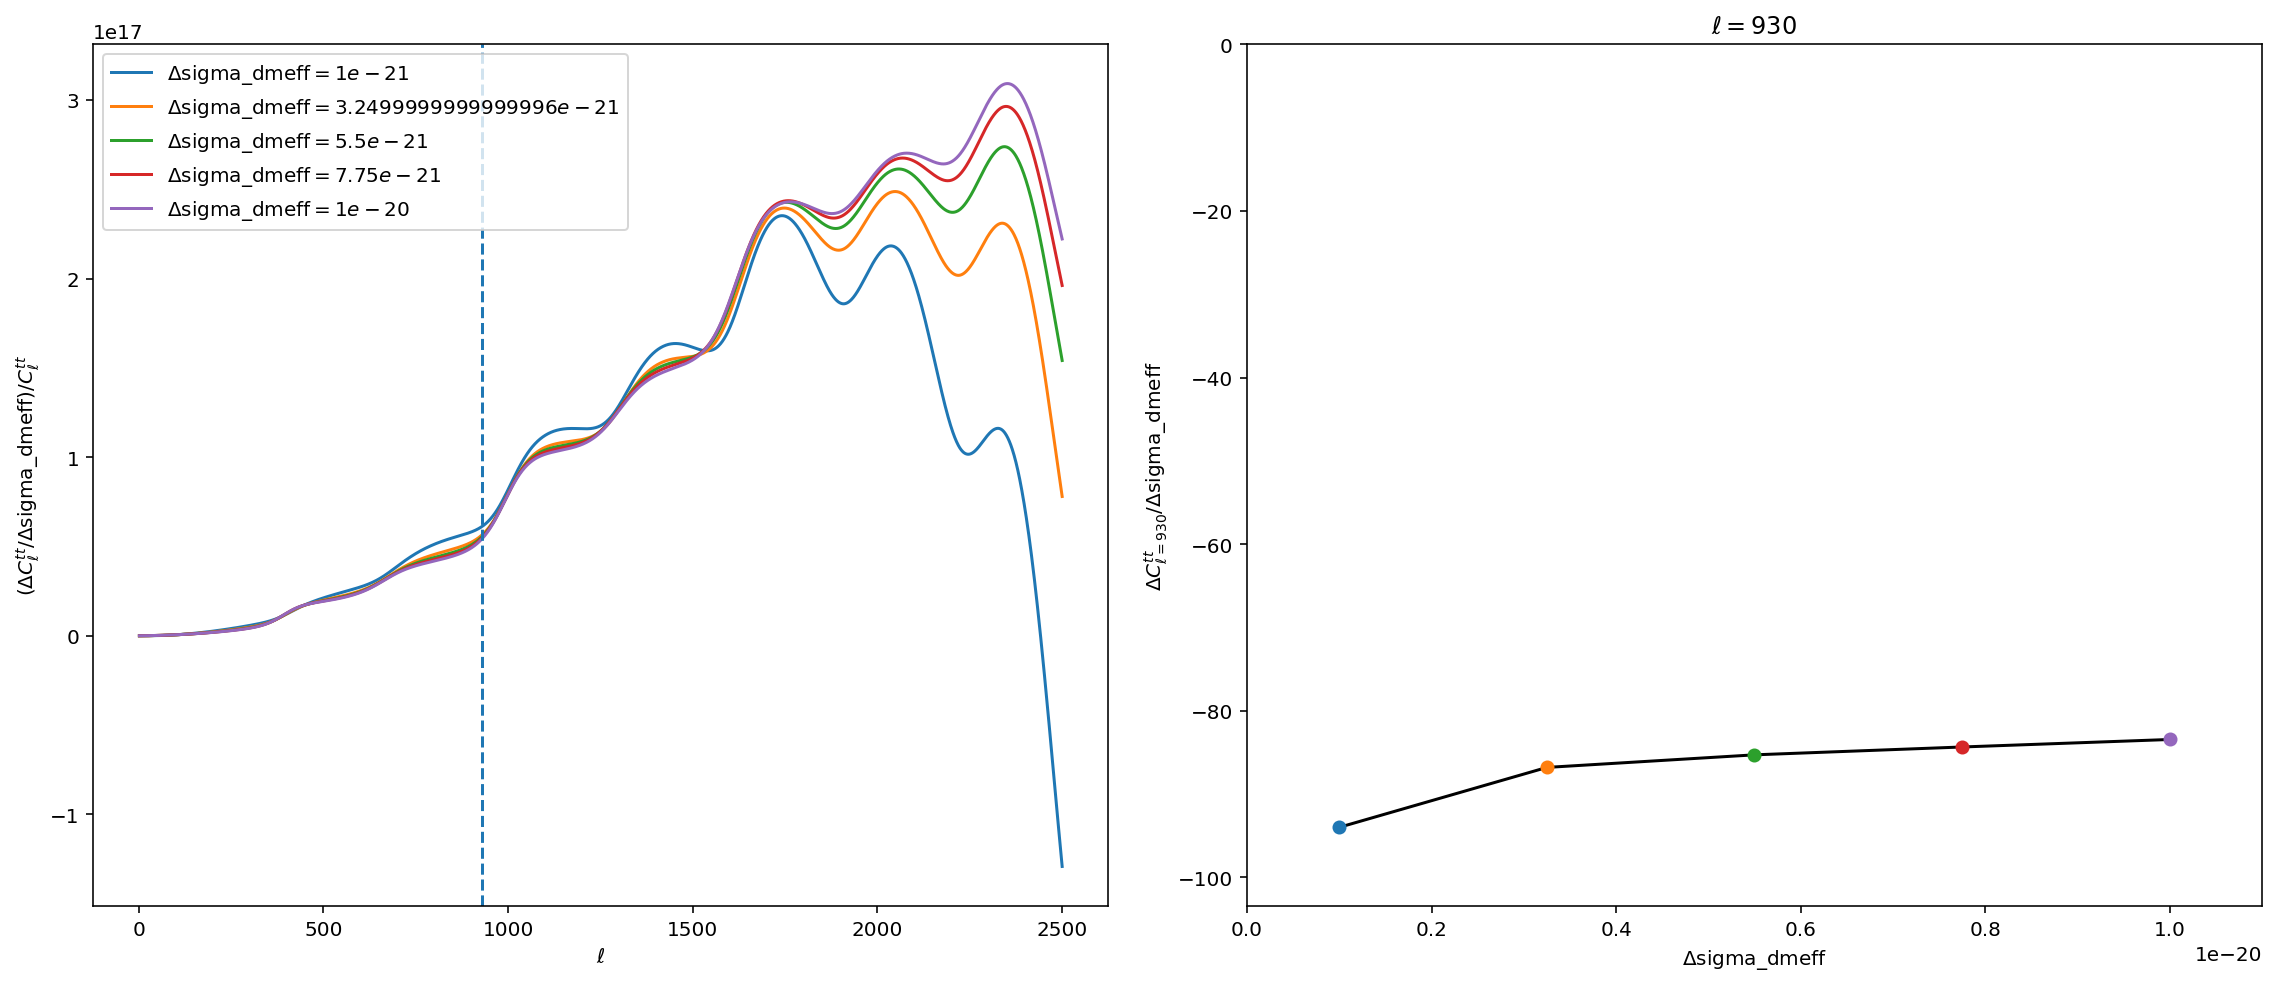

In [12]:
classy_template['m_dmeff'] = 15e-6
classy_template['npow_dmeff'] = 4
# change the size 
# in paper 1.6e-20
# in my JP 
obs.check_deriv_compute("sigma_dmeff", np.linspace(1e-21, 1e-20, 5), 
                        classy_template, verbose=False)
obs.check_deriv_plot('sigma_dmeff', ell=930, l_max=2500)

## 15 keV, n=6
The derivative does not converge for smaller step sizes, and the code runs very slowly and does not stop for larger step size. 

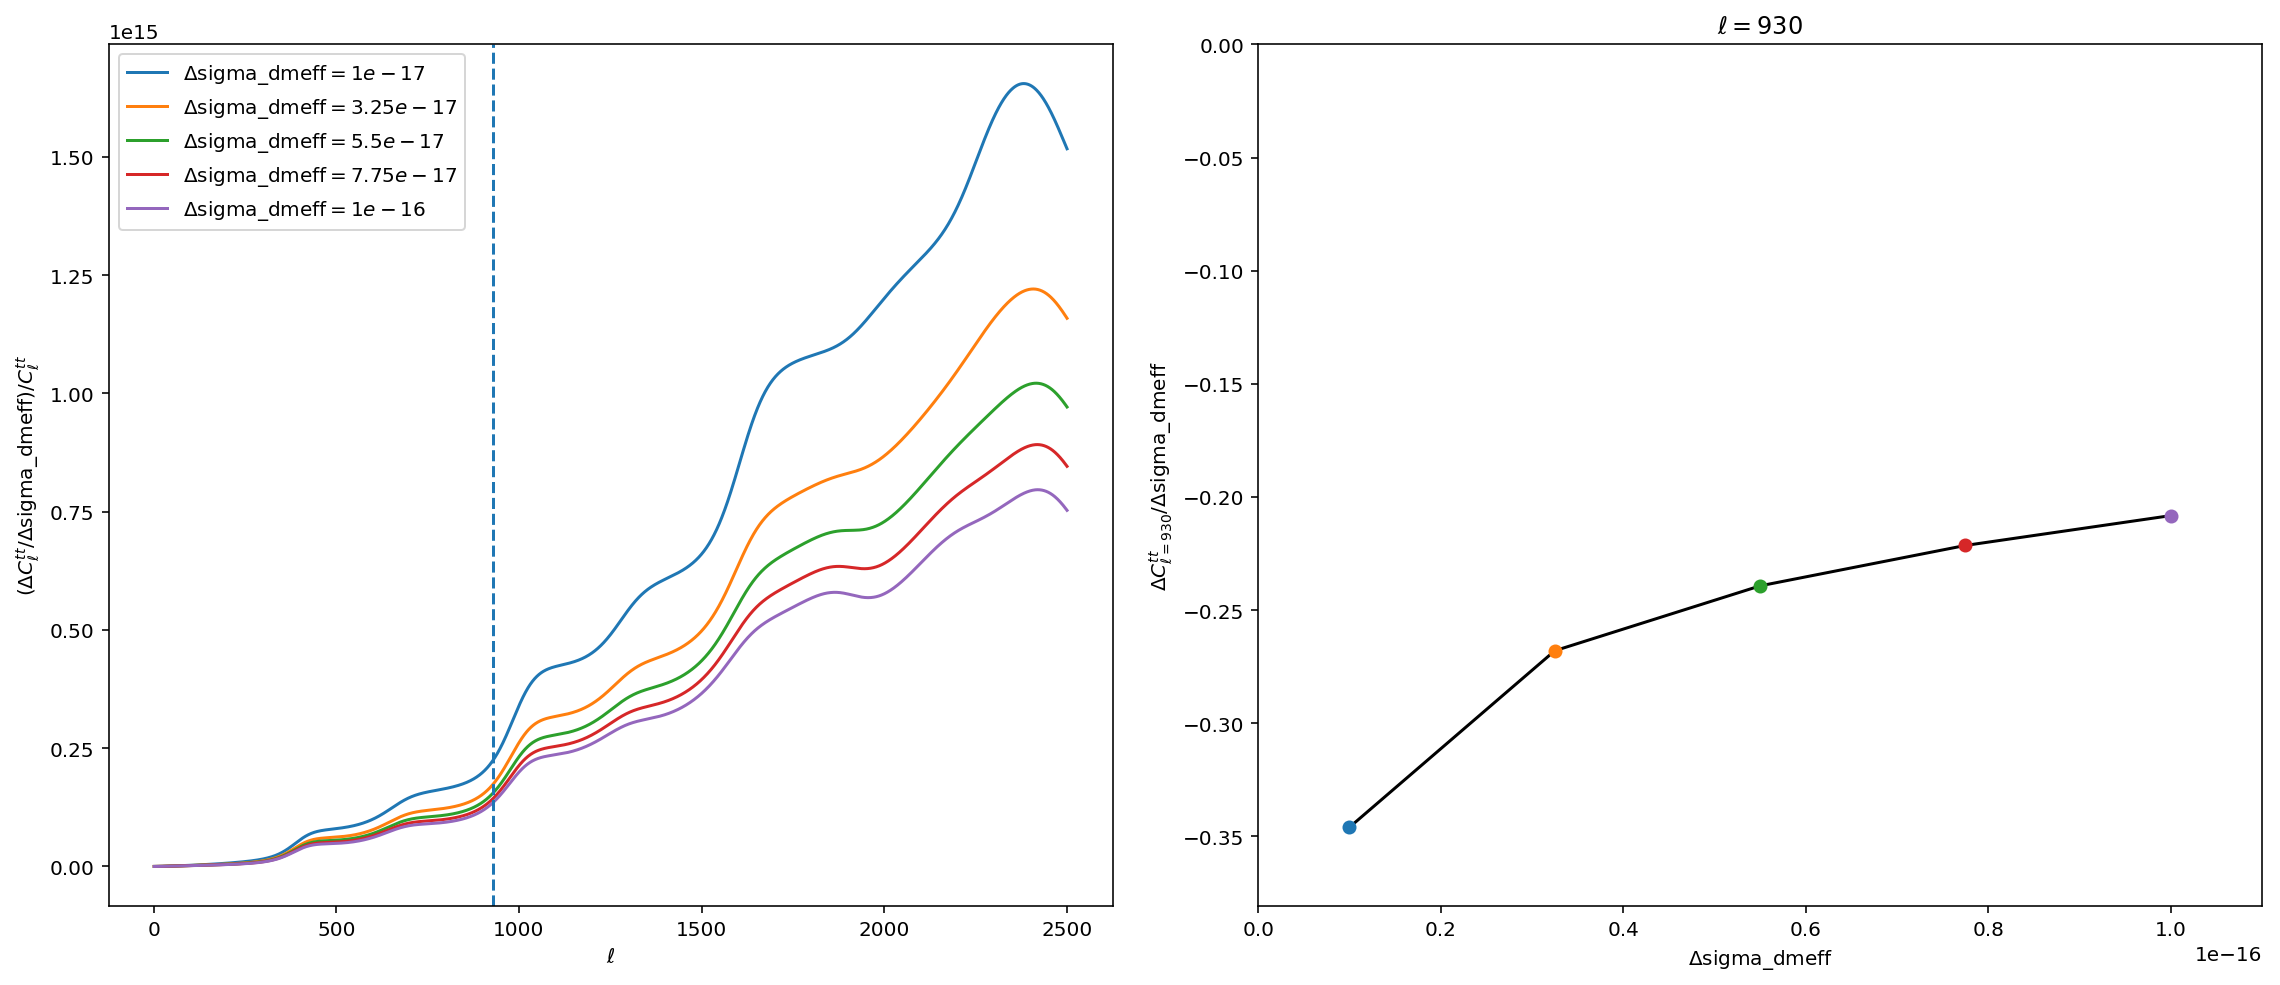

In [13]:
classy_template['m_dmeff'] = 15e-6
classy_template['npow_dmeff'] = 6
# change the size 
# in paper no value given
obs.check_deriv_compute("sigma_dmeff", np.linspace(1e-17, 1e-16, 5), 
                        classy_template, verbose=False)
obs.check_deriv_plot('sigma_dmeff', ell=930, l_max=2500)

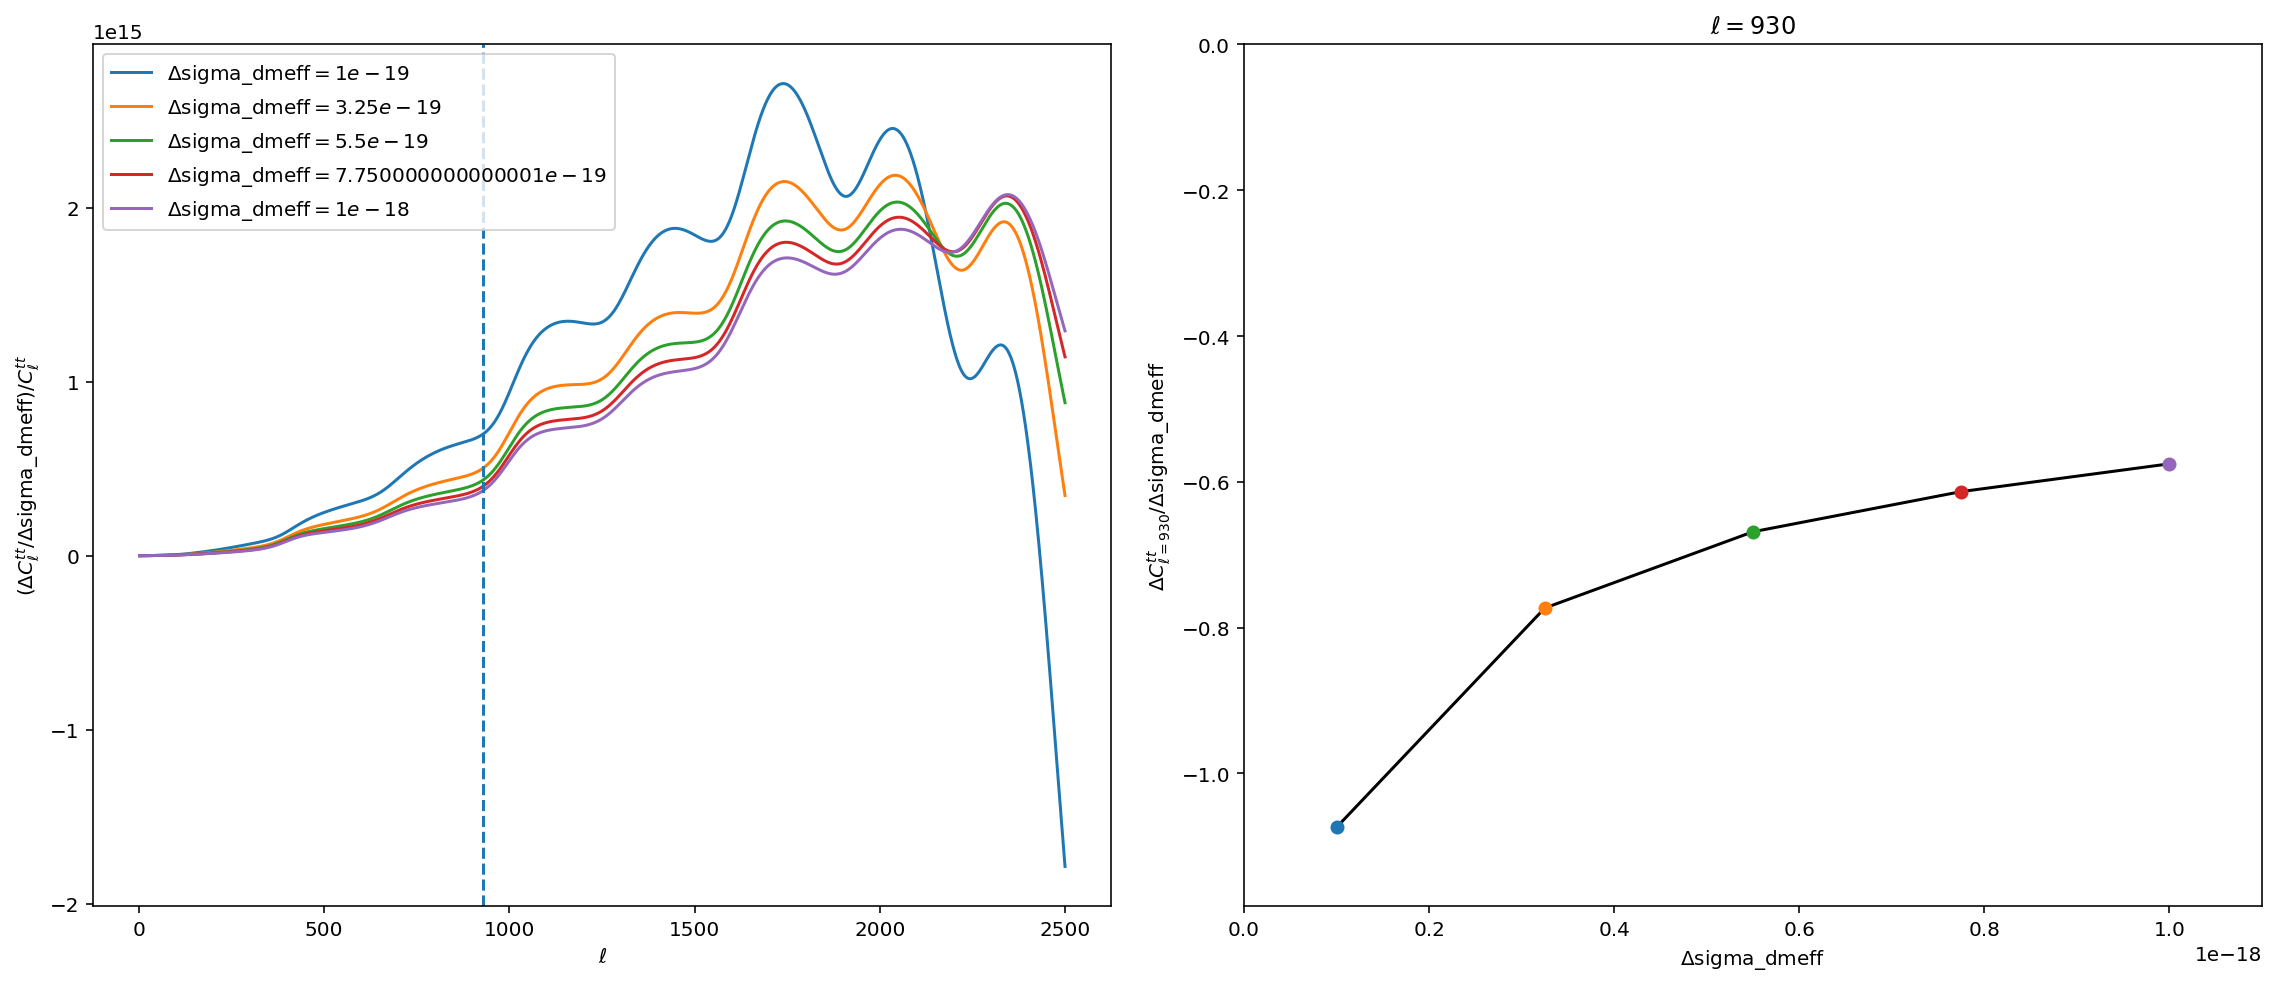

In [14]:
classy_template['m_dmeff'] = 15e-6
classy_template['npow_dmeff'] = 6
# change the size 
# in paper no value given
obs.check_deriv_compute("sigma_dmeff", np.linspace(1e-19, 1e-18, 5), 
                        classy_template, verbose=False)
obs.check_deriv_plot('sigma_dmeff', ell=930, l_max=2500)

In [ ]:
# the code did not finish running
classy_template['m_dmeff'] = 15e-6
classy_template['npow_dmeff'] = 6
# change the size 
# in paper no value given
obs.check_deriv_compute("sigma_dmeff", np.linspace(1e-15, 1e-14, 5), 
                        classy_template, verbose=False)
obs.check_deriv_plot('sigma_dmeff', ell=930, l_max=2500)